# Model Benchmark

The cleaned and feature processed dataframe is fit into linear regression model. The model performance and prediction is generated. 

In [98]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn import metrics
from sklearn import preprocessing

import pickle


import warnings
warnings.filterwarnings('ignore')

In [99]:
df = pd.read_csv('../data/train_02_Engineered_forModelTraining.csv')
df.head(5)

,resale_price,mid_storey,hdb_age,bus_interchange,max_floor_lvl,Mall_Nearest_Distance,Hawker_Nearest_Distance,floor_area_sqft,Ammenities_same_block,Ammenities_within_500m,...,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,region_east,region_north,region_north_east,region_west
0,680000.0,11,15,0,25,1094.090418,154.753357,968.760,0,1.0,...,0,0,1,0,0,0,0,0,0,0
1,665000.0,8,34,1,9,866.941448,640.151925,1399.320,0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,838000.0,14,24,1,16,1459.579948,1762.082341,1550.016,0,0.0,...,0,0,0,0,1,0,0,0,0,1
3,550000.0,3,29,1,11,950.175199,726.215262,1108.692,1,0.0,...,0,0,1,0,0,0,0,0,0,0
4,298000.0,2,34,0,4,729.771895,1540.151439,893.412,0,0.0,...,0,0,1,0,0,0,0,1,0,0


---
## Model Prep

In [100]:
# Create Feature Matrix (X) and target vector (Y)
Y = df['resale_price']
X = df.drop(columns=['resale_price'])

In [101]:
# train-test-split into 5-folds
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)


In [102]:
# apply StandardScalar Scaling technique to transform both X_train and X_test
ss = preprocessing.StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [103]:
# instantiate the models 

# Linear Regression
lr = LinearRegression()

# LassoCV 
#lassocv = LassoCV(n_alphas=200)
lassocv = LassoCV(cv=5)

# RidgeCV
ridgecv = RidgeCV(alphas=np.linspace(.1, 10, 100))

---
## Cross Validation

In [104]:
# Crosss validation of linearRegression
lr_cvs = cross_val_score(lr, X_train_sc, y_train, cv = 5 )

In [105]:
# Crosss validation of Lasso
lasso_cvs = cross_val_score(lassocv, X_train_sc, y_train, cv = 5)

In [106]:
# Crosss validation of Ridge
ridge_cvs = cross_val_score(ridgecv, X_train_sc, y_train, cv = 5)

In [107]:
# CVS mean of the different models
print("Cross Validation Score for different Models")
print(f"LinearReression - cvs score = {lr_cvs.mean()}")
print(f"Lasso - cvs score = {lasso_cvs.mean()}")
print(f"Ridge - cvs score = {ridge_cvs.mean()}")

Cross Validation Score for different Models
LinearReression - cvs score = 0.8670759785522785
Lasso - cvs score = 0.8670301797856489
Ridge - cvs score = 0.8670756194885758


### Cross Validation Score results:
Cross Validation Score for different Models
- LinearReression - cvs score = 0.8670759785522785
- Lasso - cvs score = 0.8670301797856489
- Ridge - cvs score = 0.8670756194885758

Remarks:
The score for both Linear Regression and RidgeCV are almost identical, while LassoCV provided lower score. 
Since there is no score improvement in using Ridge and Lasso, while both models took longer time to train the data set, LinearRegression will therefore be applied for this project. 

---
### Model Fitting and Evaluation

In [108]:
lr.fit(X_train_sc, y_train)

LinearRegression()

In [109]:
lr_train_score = lr.score(X_train_sc, y_train)
lr_test_score = lr.score(X_test_sc, y_test)

print(f"LR - Train score = {lr_train_score} , Test Score = {lr_test_score}")

LR - Train score = 0.867275905932557 , Test Score = 0.863309638499884


In [110]:
# Evaluate the model
Y_predict = lr.predict(ss.transform(X))
print(f"MSE (Y, Y_Predict) = ",metrics.mean_squared_error(Y, Y_predict, squared=False) )

MSE (Y, Y_Predict) =  52329.10978433576


In [111]:
## perform these steps to collect the score and RMSE for Ridge and Lasso
ridgecv.fit(X_train_sc, y_train)
ridge_train_score = ridgecv.score(X_train_sc, y_train)
ridge_test_score = ridgecv.score(X_test_sc, y_test)
ridge_alpha = ridgecv.alpha_

lassocv.fit(X_train_sc, y_train)
lasso_train_score = lassocv.score(X_train_sc, y_train)
lasso_test_score = lassocv.score(X_test_sc, y_test)
lasso_alpha = lassocv.alpha_



In [112]:
print(f"Lasso - train score: {lasso_train_score} - test score:{lasso_test_score} - alpha:{lasso_alpha} ")
print(f"Ridge - train score: {ridge_train_score} - test score:{ridge_test_score} - alpha:{ridge_alpha} ")
print(f"LR - train score: {lr_train_score} - test score:{lr_test_score}")

Lasso - train score: 0.8672317659727258 - test score:0.8633076527764767 - alpha:94.07044759685142 
Ridge - train score: 0.8672767181213253 - test score:0.8633100176991629 - alpha:3.8000000000000003 
LR - train score: 0.867275905932557 - test score:0.863309638499884


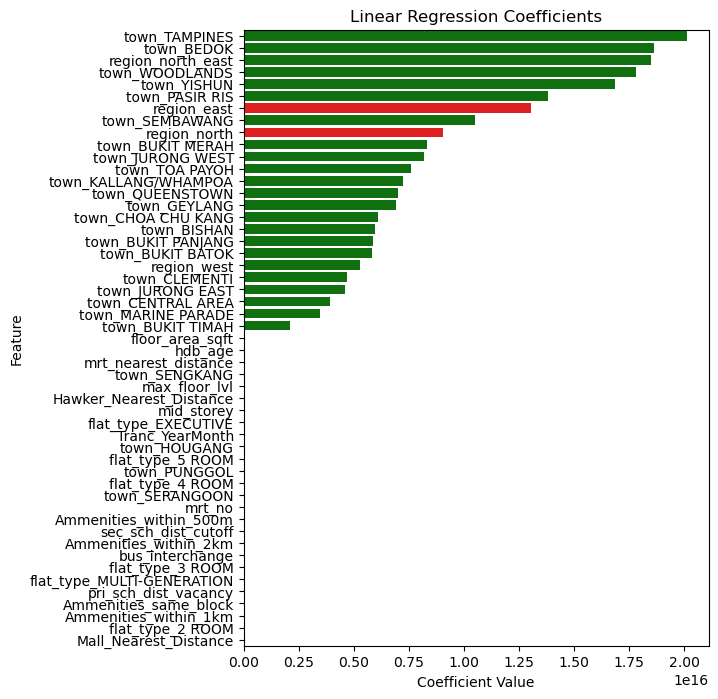

In [113]:
coefficient_df = pd.DataFrame()
coefficient_df['Column_Name'] = X_train.columns
coefficient_df['Coefficient_Value'] = pd.Series(lr.coef_)
coefficient_df['abs_Coefficient_Value'] = abs(coefficient_df['Coefficient_Value'])
coefficient_df['log_Coefficient_Value'] = np.log1p(coefficient_df['abs_Coefficient_Value'])
coefficient_df = coefficient_df.sort_values(by='abs_Coefficient_Value', ascending=False)

plt.figure(figsize=(6, 8))
top_coefficient_df = coefficient_df.head(100)
top_coefficient_df['Color'] = ['green' if coef > 0 else 'red' for coef in top_coefficient_df['Coefficient_Value']]
sns.barplot(x='abs_Coefficient_Value', y='Column_Name', data=top_coefficient_df, palette=top_coefficient_df['Color'], orient='h')
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

> AfterNote: In linear regression models, the issue with categorical features lies in their one-hot encoding, which can lead to multicollinearity. One-hot encoding creates binary (0 or 1) columns for each category, introducing a high correlation between these dummy variables. This correlation can result in inflated coefficients for the dummy variables, making them seem more influential than they actually are. The regularization techniques like Lasso and Ridge can be applied to prevent overfitting and control the impact of individual features, especially when dealing with multicollinearity introduced by one-hot encoding of categorical variables.

---
### Validating the LINE and Multicollinearity Assumption
> Overall, the validation shows that Linear Regression is a suitable regression model

In [114]:
def calculate_residuals(model, features, target):
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': target, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [115]:
def linear_assumption(model, features, target):
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, target)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)#, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

In [116]:
def homoscedasticity_assumption(model, features, target):
       
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, target)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def multicollinearity_assumption(features, feature_names=None):

    
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

### (L) Linearity - there is linear relationship between the predictors (features) and the response variable (target)
> from the scatter plot between predicted and actual, there is evenly spread along the diagonal line 

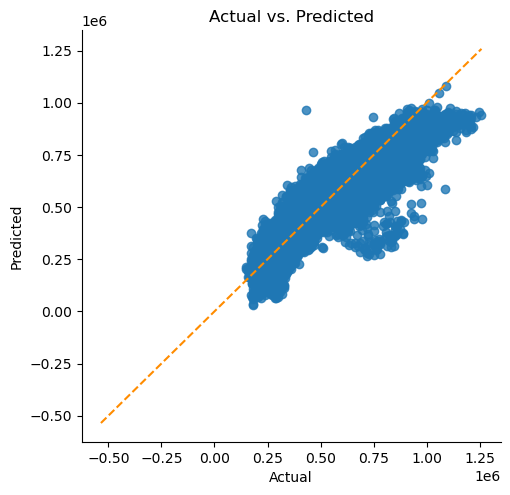

In [118]:
linear_assumption(lr, ss.transform(X), Y )

### (I) Independence - independence of the sample data
> By assumption of this the data source, the sample data is indenpent from one another


### (N) Normality - the error terms of the model are normally distributed. 
> The residuals (i.e. error terms) is normally distributed

<Axes: xlabel='Residuals', ylabel='Count'>

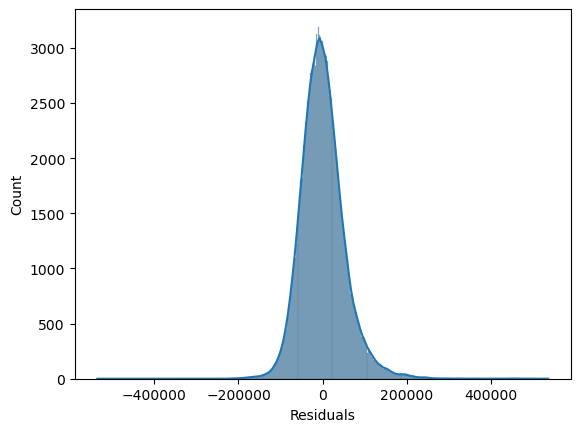

In [119]:
df_results = calculate_residuals(lr, ss.transform(X), Y )
sns.histplot(df_results['Residuals'], kde=True)

### (E) Equal Variances (i.e. Homoscedasticity) - same variance within the error terms. 
> The residual plot shows uniform variance across the residuals. 

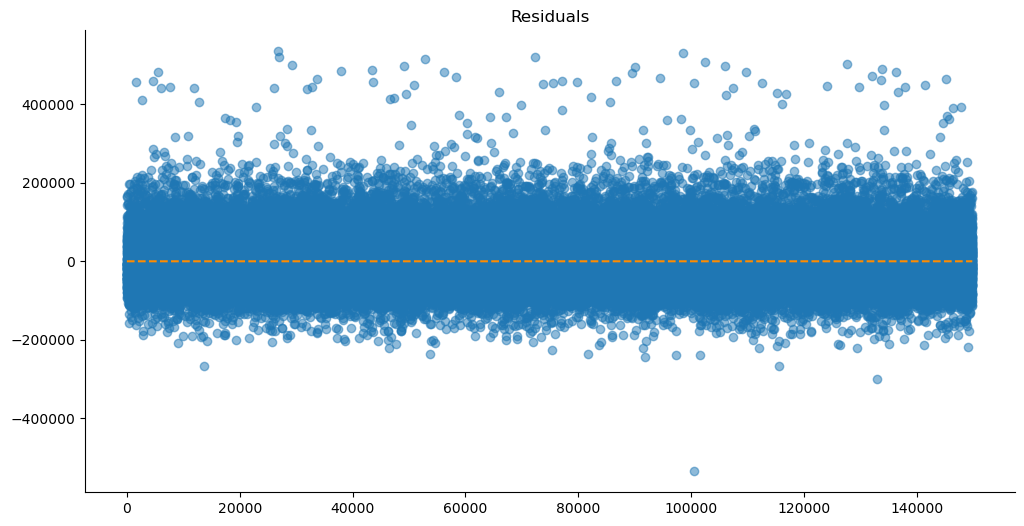

In [120]:
homoscedasticity_assumption(lr, ss.transform(X), Y)

### (M) Multicollinearity Assumption - Predictors used in the regression are not correlated with each other
> Almost all the predictors have very weak correlation observed on the heatmap, indicating little or no multicollinearity.There is medium negative correlation between "hdb_age" and "max_floor_level" , as well as between "hdb_age" and "Hawker_nearest_Distance". This could be attributed to the design of the older hdb estates (e.g. those built before 1980's) having lesser tall HDB buildings, and less hawkers centers in the old hdb estates. There is medium correlation between "max_floor_lvl" and "mid_storey", that could be due to the higher the hdb building, there is more transaction records registered for unit at the higher storey. 

Assumption 3: Little to no multicollinearity among predictors


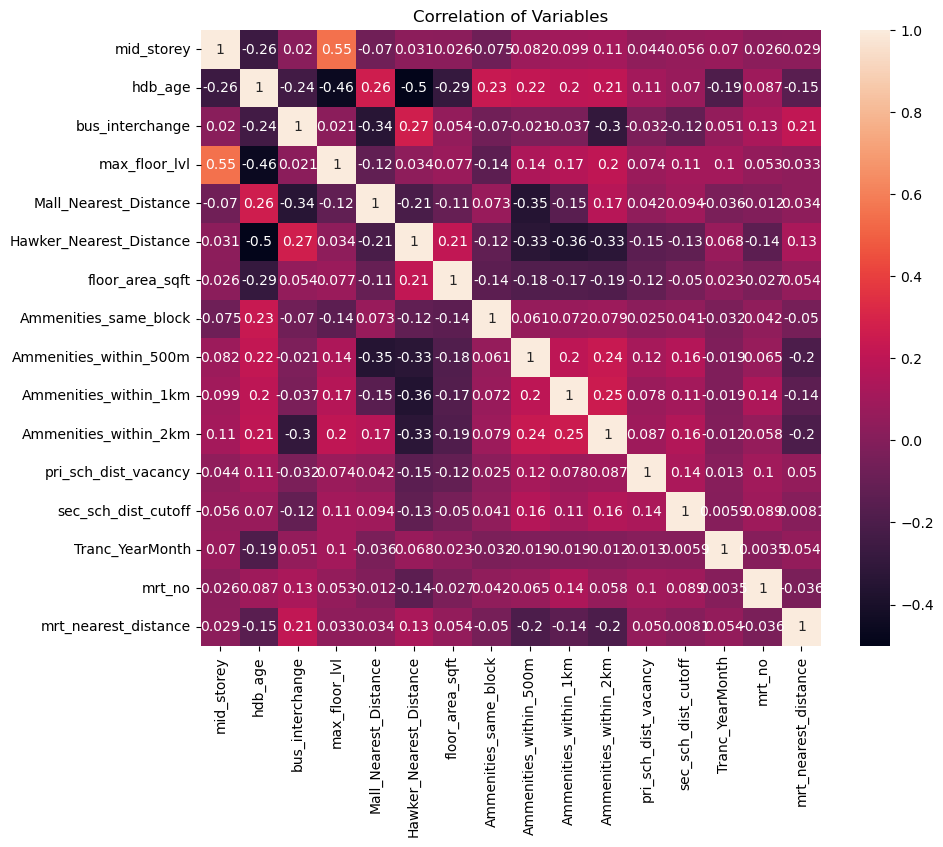

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
mid_storey: 4.725273275615684
hdb_age: 14.599171305847177
bus_interchange: 2.9640324079006324
max_floor_lvl: 14.538905055446689
Mall_Nearest_Distance: 7.426462189311165
Hawker_Nearest_Distance: 3.9038712857045357
floor_area_sqft: 19.543282881501526
Ammenities_same_block: 1.3245786908538313
Ammenities_within_500m: 3.1676452618502307
Ammenities_within_1km: 3.559069252548447
Ammenities_within_2km: 3.430443551835883
pri_sch_dist_vacancy: 3.255767138971841
sec_sch_dist_cutoff: 4.02788564888245
Tranc_YearMonth: 91.9589701279973
mrt_no: 18.35583990585217
mrt_nearest_distance: 4.761336869124399

5 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (

In [121]:
# load the dataframe with the full features set. 
#  Note - the df from train_02_Engineered_forModelTraining.csv is full feature set with one-hot-encoding applied. 
#         Therefore it is not appropriate for multicollinearity assumption validation 
df_features = pd.read_csv('../data/train_02_Engineered_fullfeatures.csv')
X_feature = df_features.drop(columns=['resale_price'])

# 'town','flat_type' and 'region' are categorical data, not able to analyze in a heatmap
X_feature.drop(columns=['town','flat_type','region'], inplace=True)

multicollinearity_assumption(X_feature, X_feature.columns)

---
### Export data for next step
- trained LinearRegression Model and StandardScalar are serialized into a Pickle file 

In [122]:
pfile = open('../data/hdb_lr.pkl','wb')
pickle.dump(lr, pfile)
pfile.close()


In [123]:
ssfile = open('../data/hdb_ss.pkl','wb')
pickle.dump(ss, ssfile)
ssfile.close()
